In [10]:
using StatsBase
using DataStructures
using Plots

include("cutoff.jl")

lazy_ehrenfest (generic function with 1 method)

In [68]:
function run_chain(balls, P, num_steps, urn=1)
    """ Returns an array that holds the counts of the number of balls in 
        urn ``urn".
    """
    num_urns = 2
    @assert urn <= num_urns

    urn_counts = [] # holds the number of balls in urn ``urn"

    for i = 1:num_steps
        # pick source of ball to move
        src = StatsBase.sample(1:num_urns, ProbabilityWeights(balls))
        
        # choose destination of the ball
        dest = StatsBase.sample(1:num_urns, ProbabilityWeights(P[src, :]))

        # take the step
        balls[src] -= 1
        balls[dest] += 1
        
        # keep tabs of number of balls in urn 1
        push!(urn_counts, balls[urn])
    end
    urn_counts
end



function num_balls_distribution(num_balls, urn_counts)
    """ Returns the number of times 
    """
    c = counter(urn_counts)
    denom = sum(values(c))
    
    dist = zeros(num_balls)
    for i=1:num_balls
        if i in keys(c)
            dist[i] = c[i] / denom
        end
    end
    dist
end

num_balls_distribution (generic function with 1 method)

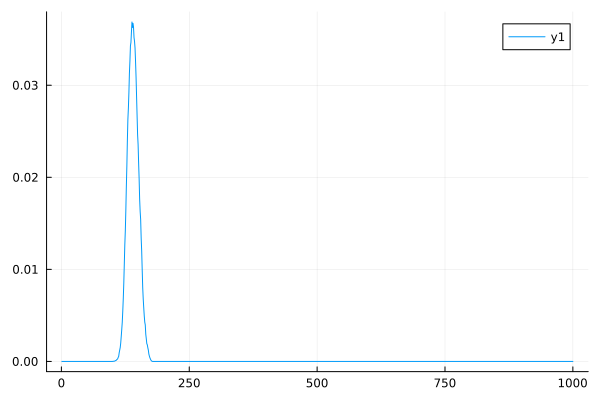

In [149]:
# P = ehrnfest(num_urns)
P = lazy_ehrenfest()
# initialize balls in the urns
num_balls = 1000
balls = [0, num_balls]
urn = 2

# to get the stationary dist of ehrenfest, take a 1000 steps, and then start 
# keeping tabs on the number of balls in urn 1
run_chain(balls, P, 1000000, urn)
urn_counts = run_chain(balls, P, 1000000, urn)
stationary = num_balls_distribution(num_balls, urn_counts)

plot(stationary)

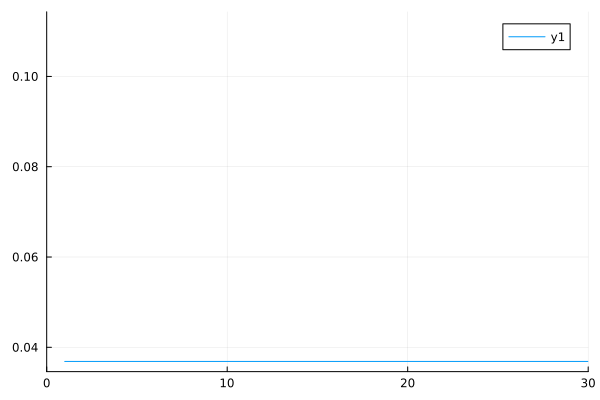

In [150]:
balls = zeros(num_urns)
balls[num_urns] = num_balls
urn_counts = run_chain(balls, P, 20000, urn)

tvds = []
final = 0

for step = 1:length(urn_counts)
    chain = first(urn_counts, step)
    dist = num_balls_distribution(num_balls, chain)
    
    push!(tvds, tvd(stationary, dist))
    final = dist
end

plot(tvds, xlims=(0, 30))

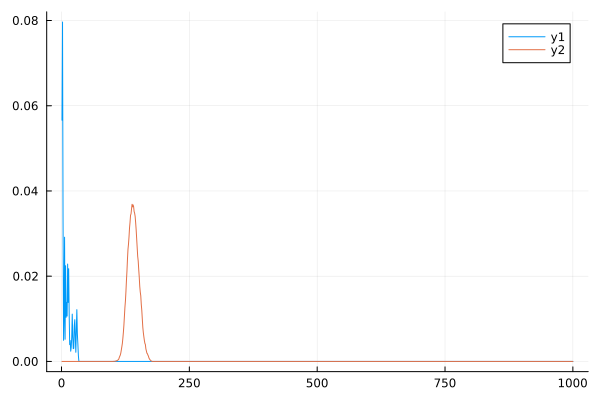

In [151]:
plot(final)
plot!(stationary)

In [157]:
P = ehrnfest(4)
P

4×4 Matrix{Float64}:
 0.0       1.0       0.0       0.0
 0.333333  0.0       0.666667  0.0
 0.0       0.666667  0.0       0.333333
 0.0       0.0       1.0       0.0